# PART3 パラメータをチューニングしてみよう

## おまじない

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('submit_sample.csv', header = None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [4]:
trainX = train.iloc[:, 0:17]

In [7]:
trainX

id  age            job   marital  education default  balance  \
0          1   39    blue-collar   married  secondary      no     1756   
1          2   51   entrepreneur   married    primary      no     1443   
2          3   36     management    single   tertiary      no      436   
3          4   63        retired   married  secondary      no      474   
4          5   31     management    single   tertiary      no      354   
5          6   29    blue-collar    single  secondary      no      260   
6          7   37       services   married  secondary      no       52   
7          8   32     technician    single  secondary      no      230   
8          9   31         admin.    single  secondary      no        0   
9         10   32  self-employed    single   tertiary      no     1815   
10        11   35  self-employed    single   tertiary      no      353   
11        12   34     technician  divorced  secondary      no     1451   
12        13   34         admin.    single   tertiary      no      625   
13        14   31     management  divorced   tertiary      no      883   
14        15   38    blue-collar   married    primary      no     5839   
15        16   71     technician   married   tertiary      no      383   
16        17   62     management   married   tertiary      no      557   
17        18   66        retired   married  secondary      no      154   
18        19   46    blue-collar   married    primary      no      369   
19        20   29         admin.    single   tertiary      no       89   
20        21   28  self-employed   married   tertiary      no      112   
21        22   67        retired   married    primary      no      708   
22        23   42     management   married   tertiary      no        4   
23        24   33         admin.  divorced  secondary      no      420   
24        25   39       services    single  secondary      no      158   
25        26   57        retired  divorced   tertiary      no       66   
26        27   43     management    single   tertiary      no        0   
27        28   46       services  divorced    unknown      no      973   
28        29   31    blue-collar   married    primary      no      -81   
29        30   36     technician    single  secondary      no      524   
...      ...  ...            ...       ...        ...     ...      ...   
27098  27099   31         admin.  divorced  secondary      no      525   
27099  27100   29    blue-collar    single  secondary      no        0   
27100  27101   46    blue-collar   married    primary      no      222   
27101  27102   32    blue-collar   married  secondary      no       14   
27102  27103   38     management   married   tertiary      no      551   
27103  27104   36   entrepreneur   married   tertiary      no      247   
27104  27105   59     management   married  secondary      no    -1246   
27105  27106   44     management    single   tertiary      no     5063   
27106  27107   40     management   married  secondary      no      752   
27107  27108   35         admin.   married  secondary      no      348   
27108  27109   33    blue-collar   married  secondary      no      661   
27109  27110   43       services   married  secondary      no      823   
27110  27111   51     management   married   tertiary      no      941   
27111  27112   50     unemployed   married  secondary      no     3478   
27112  27113   45    blue-collar   married    primary      no        0   
27113  27114   41   entrepreneur   married   tertiary      no     1065   
27114  27115   43    blue-collar   married    primary      no      -93   
27115  27116   42     management   married   tertiary      no    27696   
27116  27117   45        retired  divorced  secondary      no      187   
27117  27118   30     management    single  secondary      no       19   
27118  27119   48    blue-collar   married  secondary      no      750   
27119  27120   27     technician   married   tertiary      no    10451   
27120  27121  

## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [8]:
y = train['y']

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [9]:
testX = test.copy()

## trainXとtestXをダミー変数化しましょう

In [11]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [12]:
clf1 = DT(max_depth = 2, min_samples_leaf = 500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [14]:
cross_validate(clf1, trainX, y, cv = 5, scoring = 'roc_auc', n_jobs = -1)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.03590202, 0.03689957, 0.03589678, 0.03490496, 0.03789139]),
 'score_time': array([0.00598454, 0.004987  , 0.00598431, 0.00598431, 0.00598502]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73708019, 0.75909278]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162308, 0.74613685])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [15]:
clf2 = DT(max_depth = 10, min_samples_leaf = 500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [16]:
cross_validate(clf2, trainX, y, cv = 5, scoring = "roc_auc", n_jobs = -1)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.07579756, 0.07083797, 0.07283258, 0.09874797, 0.09474707]),
 'score_time': array([0.00501394, 0.00598359, 0.00498629, 0.00497508, 0.00599122]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.89238631, 0.88344359]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.88763037, 0.88561317])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [17]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [18]:
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [28]:
parameters = {'max_depth': list(range(2, 11))}
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [21]:
gcv = GridSearchCV(clf3, parameters, cv = 5, scoring='roc_auc', n_jobs=-1)
gcv.fit(trainX, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [24]:
gcv.cv_results_

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

{'mean_fit_time': array([0.03989301, 0.06961331, 0.0769722 , 0.08822551, 0.10358553,
        0.11196222, 0.12499003, 0.09973202, 0.1075088 ]),
 'std_fit_time': array([0.00463534, 0.0132826 , 0.00463101, 0.00960536, 0.00467542,
        0.00787942, 0.01405674, 0.00670447, 0.00248314]),
 'mean_score_time': array([0.00418887, 0.00518599, 0.00578508, 0.00458755, 0.00518575,
        0.00398932, 0.00438833, 0.00398602, 0.00398889]),
 'std_score_time': array([0.00097702, 0.00039892, 0.00171583, 0.00079764, 0.00146599,
        0.00063105, 0.00101665, 0.00107627, 0.00089288]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [36]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [37]:
train_score

array([0.74831988, 0.81244475, 0.84413657, 0.85726168, 0.86924704,
       0.88598712, 0.89898074, 0.91018922, 0.92418973])

In [38]:
test_score

array([0.74715003, 0.80746041, 0.81410356, 0.8226674 , 0.82760966,
       0.82387098, 0.82073847, 0.79373276, 0.77653758])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x2c4dcb7cf60>,
 <a list of 9 Text xticklabel objects>)

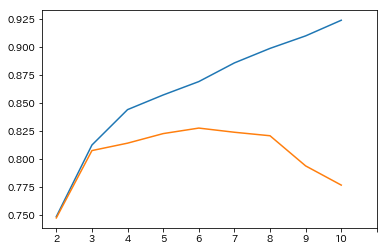

In [39]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [40]:
gcv.best_params_

{'max_depth': 6}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [41]:
pred = gcv.predict_proba(testX)

In [42]:
pred = pred[:, 1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [44]:
sample[1] = pred

In [45]:
sample.to_csv('submit3_bank.csv', index = None, header = None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [46]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [49]:
parameters2 = {'max_depth': list(range(2, 11)), 'min_samples_leaf': [5, 10, 20, 50, 100, 500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [51]:
gcv2 = GridSearchCV(clf4, parameters2, cv = 5, scoring='roc_auc', n_jobs=-1)
gcv2.fit(trainX, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

4.最適なパラメータはなんだったか確かめてみよう

In [52]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [53]:
pred2 = gcv2.predict_proba(testX)

In [56]:
pred2 = pred2[:, 1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [57]:
sample[1] = pred2
sample.to_csv('submit4_bank.csv', index = None, header = None)